<a href="https://colab.research.google.com/github/doblepensador/Tests/blob/master/RandomForests.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import graphviz
import multiprocessing
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
plt.style.use(['seaborn-whitegrid'])

In [2]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline


In [3]:
from sklearn.datasets import load_iris, load_wine, load_breast_cancer, load_diabetes

# Comparison between simple decision trees and random/extreme forests

In [14]:
iris = load_iris()
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df['target']=iris.target
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [15]:
model = make_pipeline(
    StandardScaler(),
    RandomForestClassifier()
)
cross_val_score(
    model, 
    X=iris.data, y=iris.target,
    cv=5,
    n_jobs=multiprocessing.cpu_count()
)

array([0.96666667, 0.96666667, 0.93333333, 0.96666667, 1.        ])

In [16]:
model = make_pipeline(
    StandardScaler(),
    ExtraTreesClassifier()
)
cross_val_score(
    model, 
    X=iris.data, y=iris.target,
    cv=5,
    n_jobs=multiprocessing.cpu_count()
)

array([0.96666667, 0.96666667, 0.9       , 0.93333333, 1.        ])

In [17]:
breast_cancer = load_breast_cancer()
breast_cancer_df = pd.DataFrame(data=breast_cancer.data, columns=breast_cancer.feature_names)
breast_cancer_df['target'] = breast_cancer.target
breast_cancer_df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


In [18]:
model = make_pipeline(
    StandardScaler(),
    RandomForestClassifier()
)
cross_val_score(
    model, 
    X=breast_cancer.data, y=breast_cancer.target,
    cv=5,
    n_jobs=multiprocessing.cpu_count()
)

array([0.92982456, 0.94736842, 0.99122807, 0.96491228, 0.98230088])

In [19]:
model = make_pipeline(
    StandardScaler(),
    ExtraTreesClassifier()
)
cross_val_score(
    model, 
    X=breast_cancer.data, y=breast_cancer.target,
    cv=5,
    n_jobs=multiprocessing.cpu_count()
)

array([0.93859649, 0.97368421, 0.99122807, 0.96491228, 0.97345133])

In [20]:
diabetes = load_diabetes()
diabetes_df = pd.DataFrame(data=diabetes.data, columns=diabetes.feature_names)
diabetes_df['target']=diabetes.target
diabetes_df

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0
...,...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207,178.0
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018118,0.044485,104.0
439,0.041708,0.050680,-0.015906,0.017282,-0.037344,-0.013840,-0.024993,-0.011080,-0.046879,0.015491,132.0
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044528,-0.025930,220.0


In [21]:
model = make_pipeline(
    StandardScaler(),
    RandomForestRegressor()
)
cross_val_score(
    model, 
    X=diabetes.data, y=diabetes.target,
    cv=5,
    n_jobs=multiprocessing.cpu_count()
)

# a dramatic increase in predictability is noted, 
# compared to when DecisionTreeRegressor is applied alone. 

array([0.37529206, 0.50714135, 0.44641039, 0.35909573, 0.416613  ])

In [22]:
model = make_pipeline(
    StandardScaler(),
    ExtraTreesRegressor()
)
cross_val_score(
    model, 
    X=diabetes.data, y=diabetes.target,
    cv=5,
    n_jobs=multiprocessing.cpu_count()
)

# a dramatic increase in predictability is noted, 
# compared to when DecisionTreeRegressor is applied alone. 

array([0.4044205 , 0.46928782, 0.44916504, 0.43716693, 0.47187578])

# Visualizing RandomForests/ExtraTrees 

## Classifiers

In [36]:
n_classes = 3
n_estimators = 30
cmap = plt.cm.RdYlBu
plot_step = 0.02
plot_step_coarser = 0.5 
Random_SEED = 13 

# n_estimators : The No. of decision trees the model will make.   
# max_features : The No. of features the model will make use of in making decision trees.  
# default 는 auto 이며, 의미는 전체 feature 개수에 square-root 값이다. 

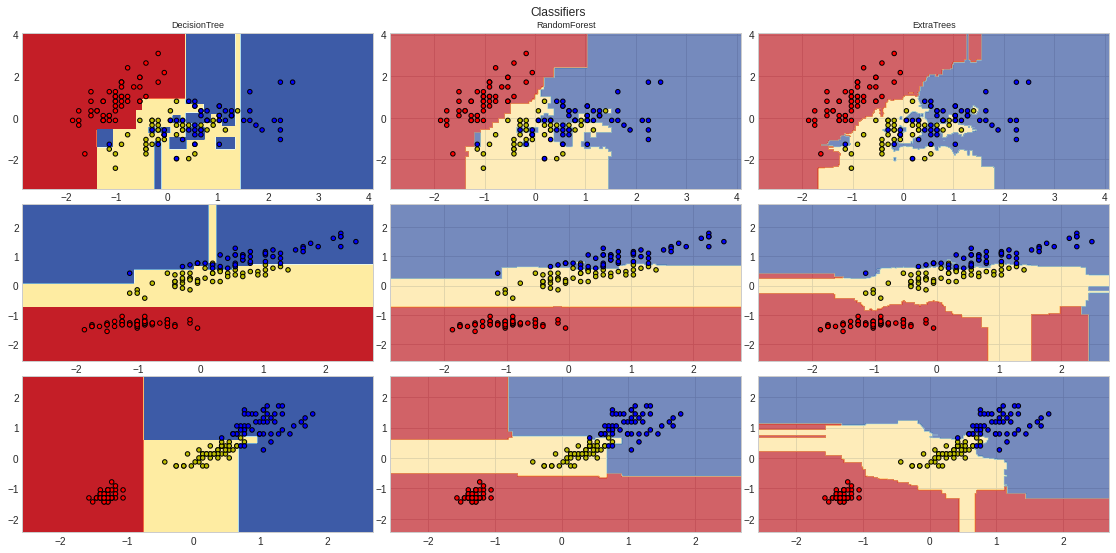

In [44]:
plot_idx = 1
models = [DecisionTreeClassifier(max_depth=None),
          RandomForestClassifier(n_estimators=n_estimators),
          ExtraTreesClassifier(n_estimators=n_estimators)]

plt.figure(figsize=(16, 8))

for pair in ([0,1], [0,2], [2,3]):
   #Arbitrarily, pick out 3 pairs of features.

   for model in models:
     X = iris.data[:, pair]
     y = iris.target

    #  idx = np.arange(X.shape[0])
    #  np.random.seed(Random_SEED) # 난수 생성기 알고리즘의 시드를 설정
    #  np.random.shuffle(idx) # Sample 순서를 셔플링 한다.  
    #  X = X[idx]
    #  y= y[idx]

     mean = X.mean(axis=0)
     std = X.std(axis=0) #Axis=0 열(세로)
     X= (X-mean) / std

     model.fit(X, y)

     model_title = str(type(model)).split(".")[-1][:-2][:-len("Classifier")]

     plt.subplot(3,3, plot_idx)
     if plot_idx <= len(models):
       plt.title(model_title, fontsize = 9)

     x_min, x_max = X[:,0].min()-1, X[:,1].max()+1
     y_min, y_max = X[:,1].min()-1, X[:,1].max()+1
     xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                          np.arange(y_min, y_max, plot_step))
     
     if isinstance(model, DecisionTreeClassifier):
       Z = model.predict(np.column_stack([xx.ravel(), yy.ravel()]))
       Z = Z.reshape(xx.shape)
       cs = plt.contourf(xx, yy, Z, cmap=cmap)
     else:
       estimator_alpha = 1.0 / len(model.estimators_) 
       for tree in model.estimators_:
         Z= model.predict(np.column_stack([xx.ravel(), yy.ravel()]))
         Z=Z.reshape(xx.shape)
         cs = plt.contourf(xx, yy, Z, cmap=cmap, alpha = estimator_alpha)
     
    #  xx_coarser, yy_coarser = np.meshgrid(np.arange(x_min, x_max, plot_step_coarser),
    #                                       np.arange(y_min, y_max, plot_step_coarser))
    #  Z_points_coarser = model.predict(np.column_stack([xx_coarser.ravel(), 
    #                                                    yy_coarser.ravel()])).reshape(xx_coarser.shape)
    #  cs_points = plt.scatter(xx_coarser, yy_coarser, c=Z_points_coarser, cmap=cmap, edgecolor=None)

     plt.scatter(X[:,0], X[:,1], c=y, cmap=ListedColormap(['r', 'y', 'b']), edgecolor='k', s=20)
     
     plot_idx +=1

plt.suptitle("Classifiers", fontsize=12)
plt.axis('tight')
plt.tight_layout(h_pad=0.2, w_pad=0.2, pad=2.5)
plt.show()    


## Regressor 

In [45]:
n_classes = 3
n_estimators = 30
cmap = plt.cm.RdYlBu
plot_step = 0.02
plot_step_coarser = 0.5 
Random_SEED = 13 

# n_estimators : The No. of decision trees the model will make.   
# max_features : The No. of features the model will make use of in making decision trees.  
# default 는 auto 이며, 의미는 전체 feature 개수에 square-root 값이다. 

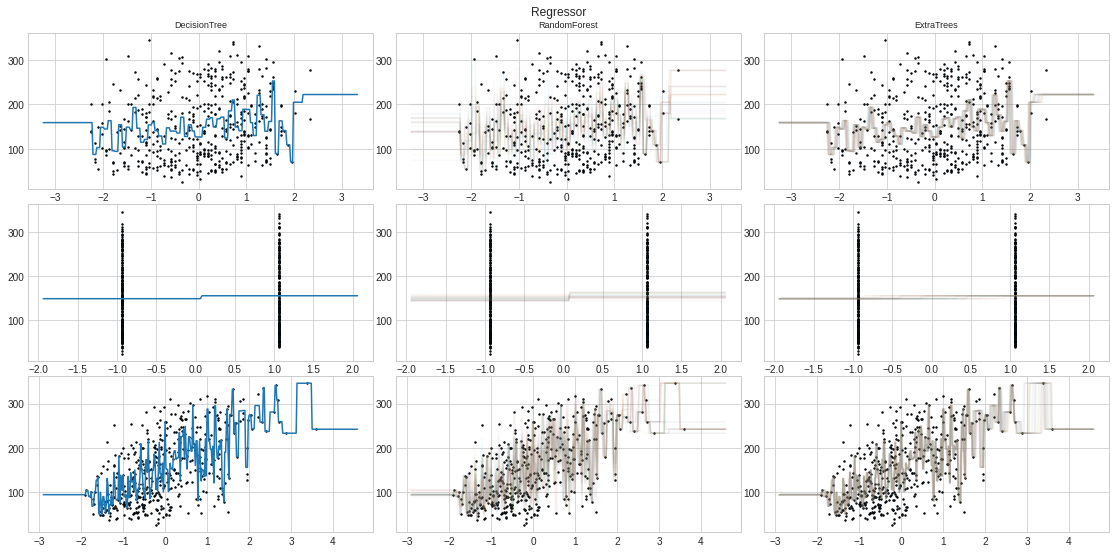

In [54]:
plot_idx = 1
models = [DecisionTreeRegressor(max_depth=None),
          RandomForestRegressor(n_estimators=n_estimators),
          ExtraTreesRegressor(n_estimators=n_estimators)]
          
plt.figure(figsize=(16, 8))

for pair in (0, 1, 2):
  for model in models:
    X= diabetes.data[:, pair]
    y= diabetes.target

    mean = X.mean(axis=0)
    std = X.std(axis=0)
    X = (X-mean)/std

    model.fit(X.reshape(-1, 1), y) 
    #reshape해서 1차원 어래이를 2차원 열로 바꿔준다. 

    model_title = str(type(model)).split(".")[-1][:-2][:-len('Regressor')]

    plt.subplot(3,3, plot_idx)
    if plot_idx <= len(models):
      plt.title(model_title, fontsize=9)

    x_min, x_max = X.min()-1, X.max()+1
    y_min, y_max = y.min()-1, y.max()+1 # countour filling이 필요 없으므로 meshgrid는 필요 없음. 
    xx, yy = np.arange(x_min, x_max, plot_step), np.arange(y_min, y_max, plot_step)

    if isinstance(model, DecisionTreeRegressor): 
      Z= model.predict(xx.reshape(-1,1))
      cs = plt.plot(xx, Z)
    else:
      estimator_alpha = 1.0 / len(model.estimators_)
      for tree in model.estimators_:
        Z = tree.predict(xx.reshape(-1,1))
        cs = plt.plot(xx, Z, alpha=estimator_alpha)
    plt.scatter(X,y, edgecolors='k', s=2)
    plot_idx +=1       

plt.suptitle("Regressor", fontsize=12)
plt.axis('tight')
plt.tight_layout(h_pad=0.2, w_pad=0.2, pad=2.5)
plt.show()   